In [1]:
#dependency import for formatting dataframe
import pandas as pd
from pathlib import Path

In [2]:
data_df = pd.read_excel(Path('FI_ Shop Responses YTD (Copy).xlsx'), 
                     index_col = 'Period',  
                     parse_dates = True)
data_df.head()

,Group,Team,Visit ID,Date,Start Time,End Time,"Total Score, %","Inquiry Score, %","Prospect Discovery Score, %","Competitive Advantages/Objection Handling Score, %",...,"[COMMENT]\nOn a scale of 0-5 Scale (5 Very well, 0 Not at all) Recap the topics covered during the conversation, highlighting positive takeaways?","On a scale of 0-2 Scale (2 Yes, 1 Somewhat, 0 No) If you confirmed further interest, ask when you'd like to start the program, and make the application process feel inviting?","[COMMENT]\nOn a scale of 0-2 Scale (2 Yes, 1 Somewhat, 0 No) If you confirmed further interest, ask when you'd like to start the program, and make the application process feel inviting?","On a scale of 0-2 Scale (2 Yes, 1 did not confirm definitive date/time, 0 No) If you confirmed further interest, attempt to schedule a follow-up appointment with the prospective student at the end of the conversation?","[COMMENT]\nOn a scale of 0-2 Scale (2 Yes, 1 did not confirm definitive date/time, 0 No) If you confirmed further interest, attempt to schedule a follow-up appointment with the prospective student at the end of the conversation?","Send follow-up information via email, within 2 hours of the conversation?","[COMMENT]\nSend follow-up information via email, within 2 hours of the conversation?","Offer additional links in the email, to encourage you to research the program further?","[COMMENT]\nOffer additional links in the email, to encourage you to research the program further?","Please provide a detailed, overall summary of the phone conversation and any additional comments about the AC's demeanor and information presented. Did they provide additional value or opportunities in any way that the above questions didn't capture?"
Period,,,,,,,,,,,,,,,,,,,,,
May - 23,NaN,HU-CBA,4730862.0,05/10/2023,10:20 PM,01:10 PM,98.6,100.0,100.0,100.0,...,NaN,NaN,I informed him I would be following up with hi...,NaN,NaN,Yes,NaN,Yes,"Yes, the email consisted of several links: cou...",It was a pleasure speaking with Michael; he wa...
Jun - 23,NaN,DEN-MIDS,4787237.0,06/21/2023,03:38 PM,04:02 PM,97.4,100.0,100.0,90.0,...,NaN,2.0,NaN,2.0,NaN,Yes,NaN,Yes,They offered to have a follow-up by another pe...,The AC was very kind and informative. He asked...
May - 23,NaN,BAY-MSW,4730839.0,05/17/2023,04:18 PM,04:50 PM,97.4,100.0,100.0,90.0,...,NaN,2.0,NaN,2.0,NaN,Yes,NaN,Yes,Email received included links and attachments.,Counselor was helpful and asked questions abou...
Jun - 23,NaN,ARC-DPT,4788654.0,06/20/2023,02:07 PM,09:26 AM,96.1,100.0,100.0,85.0,...,NaN,2.0,NaN,2.0,NaN,Yes,NaN,Yes,The e-mail was detailed and had links.,Jonathan was very friendly when we began the p...
May - 23,NaN,UNC-MPA,4730896.0,05/15/2023,10:58 AM,03:43 PM,96.1,100.0,100.0,85.0,...,NaN,2.0,NaN,2.0,NaN,Yes,NaN,Yes,Andrew sent me an email on 05/16 at 3:43pm wit...,Andrew was very polite and professional. He ga...


In [3]:
# isolate numerical data and create new df
float_df = data_df.select_dtypes(include=['float64'])
team_df = data_df['Team']
numerical_data_by_team = pd.concat([team_df, float_df], axis = 1)
numerical_data_by_team.reset_index(inplace = True)

In [4]:
# drop columns with only nulls and reset index to team
numerical_data_by_team = numerical_data_by_team.drop(columns = ['Period', 
                                                                'Group', 
                                                                'Screenshot of website inquiry submission:',
                                                                'Screenshot of phone call(s) including time and duration of call, as well as number and any emails/text communication.'])
numerical_data_by_team.set_index('Team', inplace = True)

In [5]:
numerical_data_by_team.head()

,Visit ID,"Total Score, %","Inquiry Score, %","Prospect Discovery Score, %","Competitive Advantages/Objection Handling Score, %","Closing the Conversation & Follow Up Score, %","On a scale of 0-5 Scale (5 Definitely, 0 Not at all) Discuss your personal and professional background with you, asking why you're interested in pursuing this degree, and practicing active listening, so that they were able to summarize your responses accurately? We encourage ACs to ask further questions on these topics, to make sure they uncover your interest in the field and its qualifications. Feel free to expand on how this part of the call went, below.","On a scale of 0-5 Scale (5 Definitely, 0 Not at all) Ask you engaging questions that encouraged you to assess how you could benefit directly from varying elements of the program?","On a scale of 0-5 Scale (5 Definitely, 0 Not at all) Guide the conversation, i.e., did they ask probing questions and transition to discussing a new element of the university and program, based on your goals and motivations?","On a scale of 0-5 Scale (5 Definitely, 0 Not at all) Ask ""check-in"" questions to confirm you felt more knowledgeable about the program details and/or felt more prepared to begin the application process?","On a scale of 0-5 Scale (5 Definitely, 0 Not at all) Uncover whether you considered the time commitment involved with pursuing a program like this, or how the time commitment integrates with other commitments you might have as you pursue this program? (Students typically need time to learn how to manage their personal and professional responsibilities successfully around a program's time commitments and requirements.)","On a scale of 0-5 Scale (5 Definitely, 0 Not at all) Articulate the program's value and online experience that highlight student expectations and outcomes?","On a scale of 0-3 Scale (3 Definitely, 0 Not at all) Provide the the total cost of the program, as well as discuss different ways to consider financing the program? (ACs are not responsible for providing a customized payment plan for the student. Rather, they should share ways students may consider funding.) Please describe the cost and funding options identified by the AC in the comments section.","On a scale of 0-5 Scale (5 Very well, 0 Not at all) Recap the topics covered during the conversation, highlighting positive takeaways?","On a scale of 0-2 Scale (2 Yes, 1 Somewhat, 0 No) If you confirmed further interest, ask when you'd like to start the program, and make the application process feel inviting?","On a scale of 0-2 Scale (2 Yes, 1 did not confirm definitive date/time, 0 No) If you confirmed further interest, attempt to schedule a follow-up appointment with the prospective student at the end of the conversation?"
Team,,,,,,,,,,,,,,,,
HU-CBA,4730862.0,98.6,100.0,100.0,100.0,85.7,5.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,NaN,NaN
DEN-MIDS,4787237.0,97.4,100.0,100.0,90.0,100.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,2.0
BAY-MSW,4730839.0,97.4,100.0,100.0,90.0,100.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,2.0
ARC-DPT,4788654.0,96.1,100.0,100.0,85.0,100.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,2.0
UNC-MPA,4730896.0,96.1,100.0,100.0,85.0,100.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,2.0


In [9]:
#import dependencies for nlp
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [10]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords and add if necessary
sw = set(stopwords.words('english'))
#print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# Tokenize text
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text 
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text) 
    
    # Create a tokenized list of the words (#Sentence or word?) 
    re_words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    result = [wnl.lemmatize(word) for word in re_words]
   
    # Convert the words to lowercase
    tokens= [word.lower() for word in result if word.lower() not in sw]
    
    # Remove the stop words
    # Performed above 
    
    return tokens

In [20]:
#frequency analysis dependency
from collections import Counter

In [21]:
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for commet (sample, check with Jeanette)
all_tokens = tokenizer(data_df['[COMMENT]\nOn a scale of 0-5 Scale (5 Very well, 0 Not at all) Recap the topics covered during the conversation, highlighting positive takeaways?'].str.cat())
token_count(all_tokens, 10)

[('wa', 20),
 ('would', 17),
 ('recap', 14),
 ('program', 13),
 ('information', 11),
 ('email', 11),
 ('conversation', 11),
 ('ac', 11),
 ('question', 9),
 ('could', 9)]

In [12]:
#data_df.columns

Index(['Group', 'Team', 'Visit ID', 'Date', 'Start Time', 'End Time',
       'Total Score, %', 'Inquiry Score, %', 'Prospect Discovery Score, %',
       'Competitive Advantages/Objection Handling Score, %',
       'Closing the Conversation & Follow Up Score, %',
       'Date/Time of Web Inquiry submission:',
       'What name did you provide with your inquiry?',
       'Screenshot of website inquiry submission:',
       'Did you speak on the phone with an AC after requesting information online?',
       'Did either of the following happen within 2 hours of inquiry? You received a call and answered. You received a call but did not answer, and then received either a voicemail or an email confirming the program is attempting to contact you.',
       'Did either of the following happen within 24 hours of inquiry? You received a call and answered. You received a call but did not answer, and then received either a voicemail or an email identifying the program that was attempting contact with

In [13]:
# wordcloud dependencies
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [14]:
# wordcloud function
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

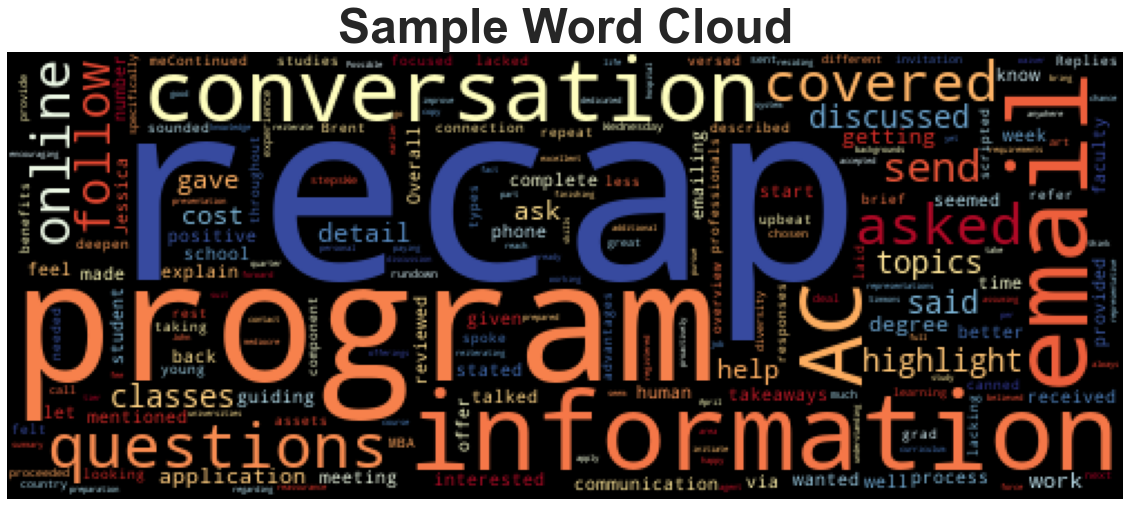

In [16]:
# sample wordcloud for single comment, get feedback first
wordcloud(data_df['[COMMENT]\nOn a scale of 0-5 Scale (5 Very well, 0 Not at all) Recap the topics covered during the conversation, highlighting positive takeaways?'].str.cat(), 
          title="Sample Word Cloud")

In [8]:
#import dependencies for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer

In [ ]:
#discuss with Jeanette what to analyze for sentiment